##                               ANALYSE DES FACTEURS CLES QUI INFLUENCENT LE CHANGEMENT CLIMATIQUE

## Table des matières
<ol>
<li><a href="#">Description du dataset</a></li>
<li><a href="#">Description du projet</a></li>
<li><a href="#">acquisition des données</a></li>
<li><a href="#Analyse">nettoyage des données</a></li>
<li><a href="#Analyse">Analyse des données</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ol>

## Description du dataset

> Date Time: Référence date-heure

  >p(mbar): Unité de pression dérivée du Pascal SI utilisée pour quantifier la pression interne. Les rapports météorologiques indiquent généralement la pression atmosphérique en millibars.
  
 > T_celsius: Température en Celsius
  
>  T_kelvin: Température en kelvin
  
 > Tdew_celsius: Température en Celsius par rapport à l'humidité. Le point de rosée est une mesure de la quantité absolue d'eau dans l'air, le DP est la température à laquelle l'air ne peut pas retenir toute l'humidité qu'il contient et l'eau se condense.
  
>  R_humidity: L'humidité relative est une mesure de la saturation de l'air en vapeur d'eau, le % HR détermine la quantité d'eau contenue dans les objets de collecte.
  
 > S_vp : Pression de vapeur saturante
  
 > VP: La pression de vapeur
  
  >D_vp: Déficit de pression de vapeur
  
 > S_humidity: Humidité spécifique
  
 > water_vc: Concentration de vapeur d'eau
  
 > Airtight: Hermétique
  
 > wind_speed: Vitesse du vent
  
>  max_WS: Vitesse maximale du vent
  
 > wind_degree: Direction du vent en degrés
>

## Description du projet 
>Tu vas écrire la description de ton projet ici...




>

In [1]:
#### importation des bibliothèques 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## Acquisition des données

In [2]:
url = "C:\\Users\\thier\\Downloads\\climate-change-excel-4-6-mb-.xls"

In [5]:
### ici on import le dataset
url1 = "C:\\Users\\thier\\Downloads\\jena_climate_2009_2016.csv"

In [7]:
### ici on transforme le dataset en dataframe
df = pd.read_csv(url1)

In [68]:
#### on affiche les 5 premières lignes
df.head()

,Date Time,p (mbar),T_celsius,T_kelvin,Tdew_celsius,R_humidity,S_vp,VP,D_vp,S_humidity,water_vc,Airtight,wind_speed,max_WS,wind_degree,Year,Month
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3,2009,1
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1,2009,1
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6,2009,1
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0,2009,1
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3,2009,1


In [69]:
#### on affiche les 5 dernières lignes 
df.tail()

,Date Time,p (mbar),T_celsius,T_kelvin,Tdew_celsius,R_humidity,S_vp,VP,D_vp,S_humidity,water_vc,Airtight,wind_speed,max_WS,wind_degree,Year,Month
420219,2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0,2016,12
420220,2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3,2016,12
420221,2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2,2016,12
420222,2016-12-31 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8,2016,12
420223,2017-01-01 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9,2017,1


In [50]:
### on renomme les colonnes
df1 = df.rename(columns={'p(mbar)':'pression', 'T (degC)':'Temp_celsius', 'Tpot (K)':'Temp_kelvin', 'Tdew (degC)':'Temp_dew_celsius', 'rh (%)':'Relative_humidity','VPmax (mbar)':'S_vapor_pressure','VPact (mbar)':'vapor_pressure', 'VPdef (mbar)':'Vapor_pressure_deficit', 'sh (g/kg)':'S_humidity','H2OC (mmol/mol)':'water_vapor_concentration','rho (g/m**3)':'Airtight','wv (m/s)':'wind_speed','max. wv (m/s)':'max_WS', 'wd (deg)':'wind_degree'}, inplace=True)

In [23]:
df.shape

(420224, 15)

## Nettayage des données

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420224 entries, 0 to 420223
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date Time     420224 non-null  datetime64[ns]
 1   p (mbar)      420224 non-null  float64       
 2   T_celsius     420224 non-null  float64       
 3   T_kelvin      420224 non-null  float64       
 4   Tdew_celsius  420224 non-null  float64       
 5   R_humidity    420224 non-null  float64       
 6   S_vp          420224 non-null  float64       
 7   VP            420224 non-null  float64       
 8   D_vp          420224 non-null  float64       
 9   S_humidity    420224 non-null  float64       
 10  water_vc      420224 non-null  float64       
 11  Airtight      420224 non-null  float64       
 12  wind_speed    420224 non-null  float64       
 13  max_WS        420224 non-null  float64       
 14  wind_degree   420224 non-null  float64       
 15  Year          420

In [70]:
### on verifi les valeurs manquantes dans chaque colonne
df.isnull().sum()

Date Time       0
p (mbar)        0
T_celsius       0
T_kelvin        0
Tdew_celsius    0
R_humidity      0
S_vp            0
VP              0
D_vp            0
S_humidity      0
water_vc        0
Airtight        0
wind_speed      0
max_WS          0
wind_degree     0
Year            0
Month           0
dtype: int64

In [27]:
#### on verifie les doublons
df.duplicated().sum()

0

In [19]:
### pour supprimer les doublons
df = df.drop_duplicates().reset_index(drop=True) 

In [28]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Year,Month
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3,2009,1
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1,2009,1
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6,2009,1
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0,2009,1
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420219,2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0,2016,12
420220,2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3,2016,12
420221,2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2,2016,12
420222,2016-12-31 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8,2016,12


In [25]:
#### on crée les colonnes year et month à partir de la colonne date time
df['Date Time'] = pd.to_datetime(df['Date Time'], format = "%d.%m.%Y %H:%M:%S")
df['Year'] = df['Date Time'].dt.year
df['Month'] = df['Date Time'].dt.month

In [72]:
df.columns

Index(['Date Time', 'p (mbar)', 'T_celsius', 'T_kelvin', 'Tdew_celsius',
       'R_humidity', 'S_vp', 'VP', 'D_vp', 'S_humidity', 'water_vc',
       'Airtight', 'wind_speed', 'max_WS', 'wind_degree', 'Year', 'Month'],
      dtype='object')

## Analyse de données 

In [44]:
### analyse descritive des données 
description = df.describe()
description

,p (mbar),T_celsius,T_kelvin,Tdew_celsius,R_humidity,S_vp,VP,D_vp,S_humidity,water_vc,Airtight,wind_speed,max_WS,wind_degree,Year,Month
count,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000
mean,989.214157,9.442421,283.484880,4.953472,76.028738,13.568642,9.532333,4.036225,6.021503,9.638778,1216.097805,1.700930,3.054884,174.748064,2012.497013,6.518673
std,8.360888,8.421135,8.502206,6.731171,16.460467,7.734770,4.183996,4.891287,2.656043,4.235244,39.967936,65.472111,69.043660,86.685323,2.289969,3.448870
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000,2009.000000,1.000000
25%,984.200000,3.360000,277.430000,0.230000,65.240000,7.770000,6.210000,0.870000,3.920000,6.280000,1187.540000,0.990000,1.760000,124.900000,2010.000000,4.000000
50%,989.580000,9.400000,283.460000,5.210000,79.300000,11.810000,8.860000,2.180000,5.590000,8.960000,1213.830000,1.760000,2.960000,198.100000,2012.000000,7.000000
75%,994.730000,15.460000,289.520000,10.070000,89.400000,17.590000,12.350000,5.290000,7.800000,12.480000,1242.790000,2.860000,4.730000,234.100000,2014.000000,10.000000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000,2017.000000,12.000000


In [56]:
#### ici on fait la correlation entre les colonnes pour determiner les facteurs qui influencent la température
df.corr()

,p (mbar),T_celsius,T_kelvin,Tdew_celsius,R_humidity,S_vp,VP,D_vp,S_humidity,water_vc,Airtight,wind_speed,max_WS,wind_degree,Year,Month
p (mbar),1.000000,-0.045290,-0.124677,-0.066870,-0.018775,-0.031492,-0.054535,-0.003154,-0.069931,-0.069973,0.307692,-0.005687,-0.007741,-0.063202,0.094966,0.057515
T_celsius,-0.045290,1.000000,0.996823,0.895959,-0.572003,0.951092,0.867967,0.761530,0.867044,0.867466,-0.963374,-0.004714,-0.002900,0.038921,0.087347,0.192851
T_kelvin,-0.124677,0.996823,1.000000,0.895174,-0.566682,0.947271,0.866515,0.756731,0.866839,0.867261,-0.981328,-0.004221,-0.002254,0.043785,0.079219,0.186877
Tdew_celsius,-0.066870,0.895959,0.895174,1.000000,-0.156666,0.799492,0.968334,0.435944,0.967587,0.968033,-0.885463,-0.008717,-0.009088,0.050114,0.094216,0.285358
R_humidity,-0.018775,-0.572003,-0.566682,-0.156666,1.000000,-0.615526,-0.151657,-0.843625,-0.150997,-0.151125,0.513777,-0.004979,-0.009873,-0.015912,-0.024505,0.104965
S_vp,-0.031492,0.951092,0.947271,0.799492,-0.615526,1.000000,0.825155,0.875495,0.824747,0.824780,-0.901486,-0.004043,-0.002241,-0.009379,0.069310,0.151487
VP,-0.054535,0.867967,0.866515,0.968334,-0.151657,0.825155,1.000000,0.449441,0.999851,0.999856,-0.850521,-0.009596,-0.010309,0.018684,0.078414,0.254124
D_vp,-0.003154,0.761530,0.756731,0.435944,-0.843625,0.875495,0.449441,1.000000,0.448923,0.448971,-0.698011,0.001816,0.005274,-0.030812,0.042527,0.022174
S_humidity,-0.069931,0.867044,0.866839,0.967587,-0.150997,0.824747,0.999851,0.448923,1.000000,0.999997,-0.853604,-0.009475,-0.010156,0.019641,0.076709,0.252296
water_vc,-0.069973,0.867466,0.867261,0.968033,-0.151125,0.824780,0.999856,0.448971,0.999997,1.000000,-0.854049,-0.009473,-0.010151,0.019871,0.076774,0.252617


In [63]:
df1 = df[['T_celsius','Tdew_celsius','R_humidity','VP','water_vc','wind_speed']]

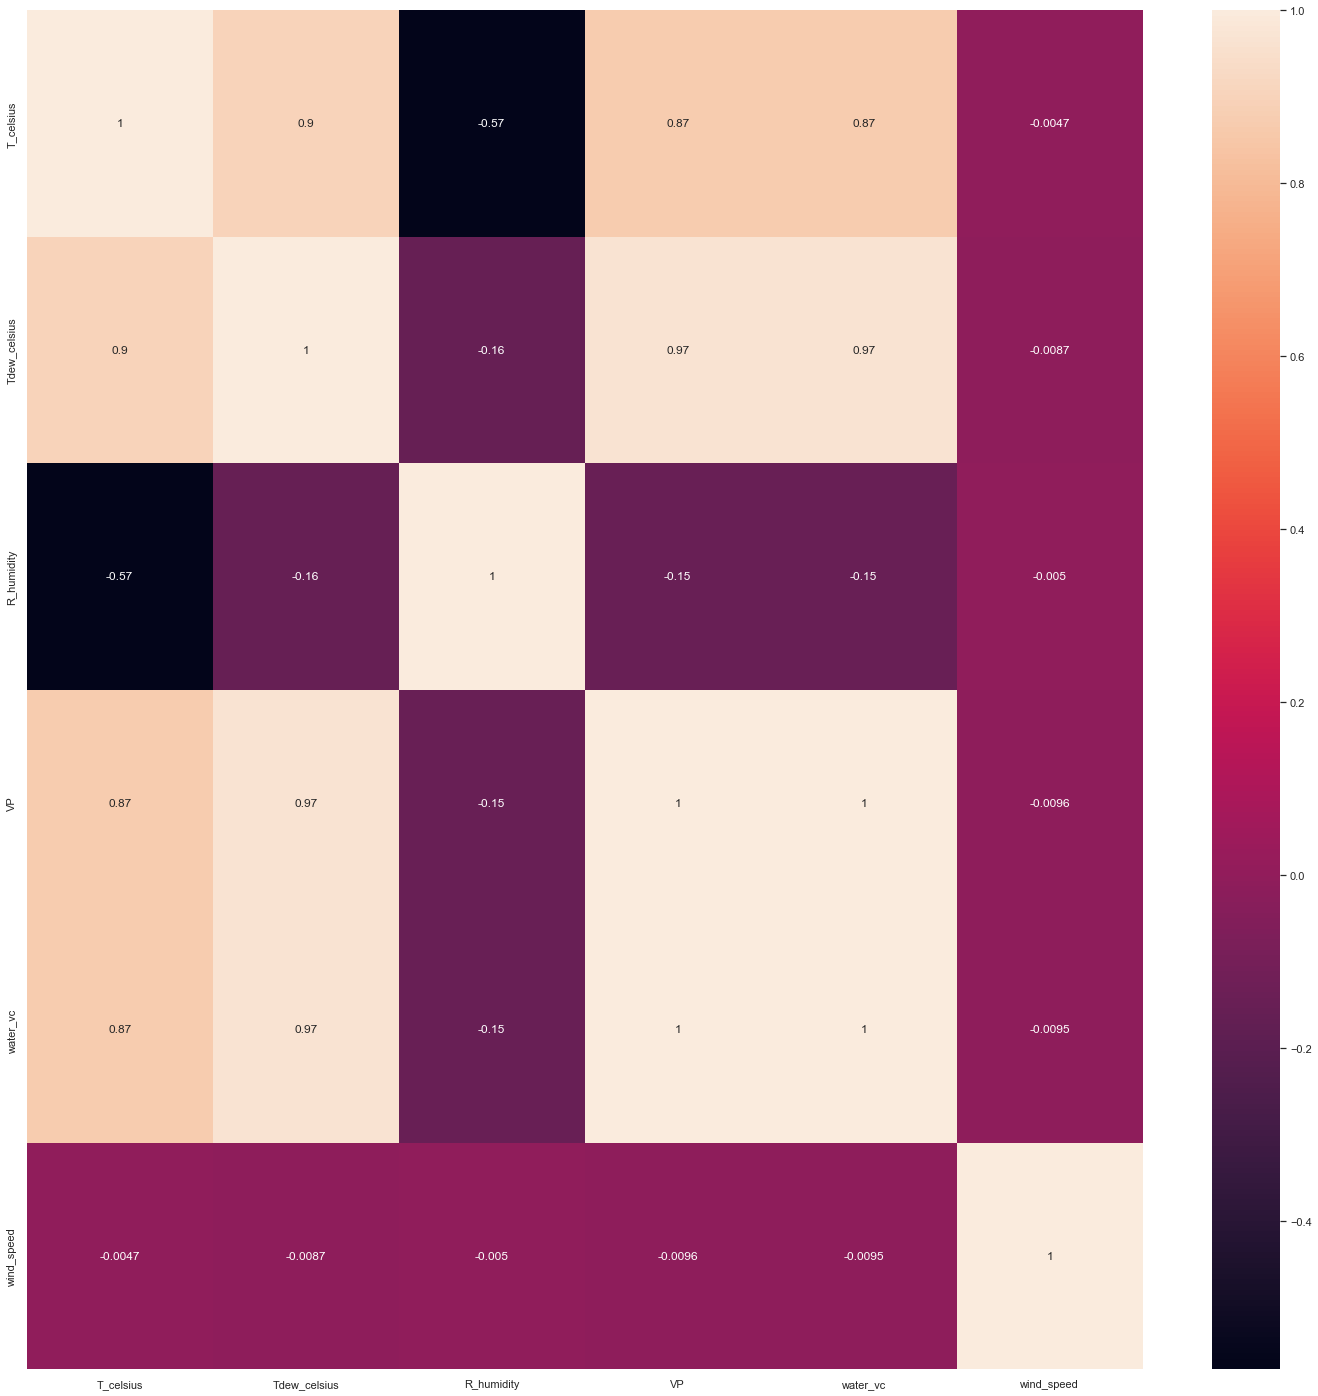

In [64]:
##### correlation entre les colonnes de df1
corrMatrix = df1.corr()
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Question de recherche 1: est-ce que l'humidité (R_humidity) influence le climat

(0.0, 40.2945)

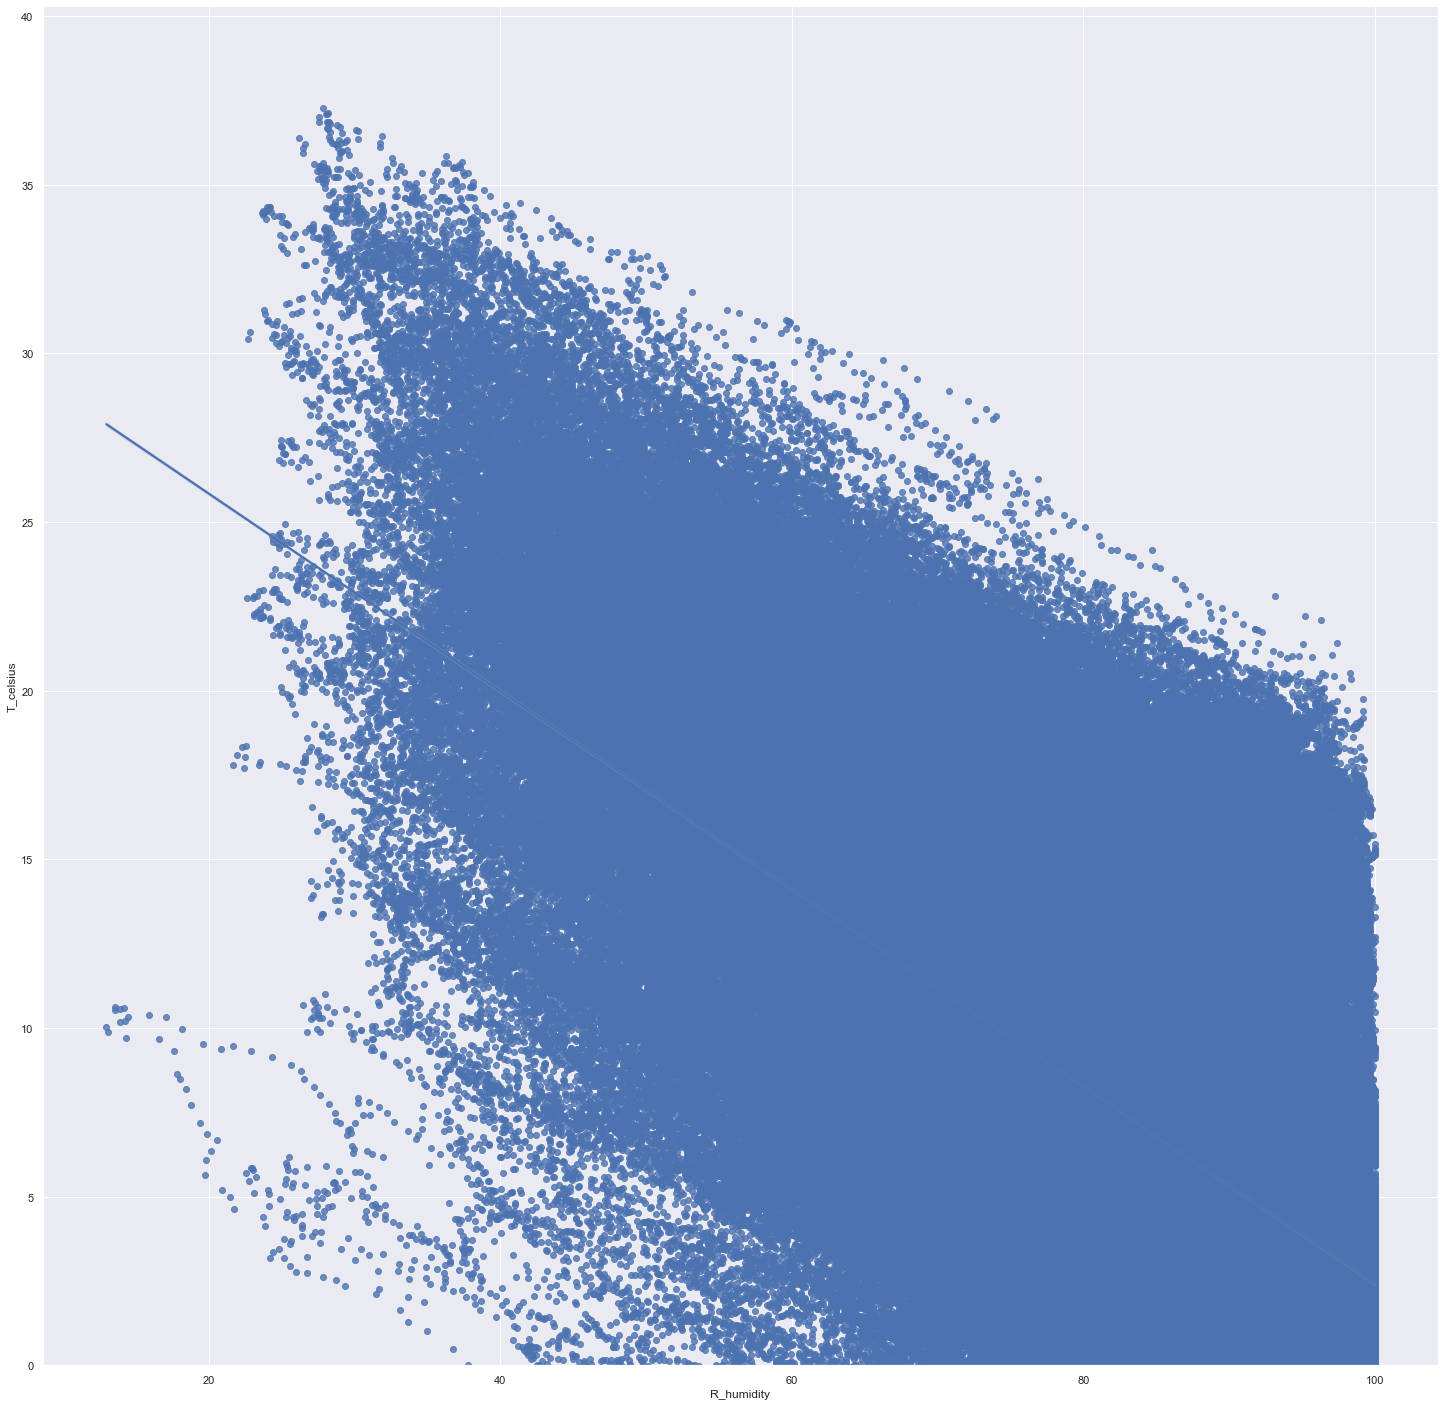

In [55]:
sns.regplot(x='R_humidity', y="T_celsius", data=df)
plt.ylim(0,)

### Résultat 1: on remarque qu'il existe une correlation negative entre l'humidité relative et la température. plus l'humidité augmente plus la température baisse donc l'humidté influence le climat.

### Question de recherche 2: est-ce que la pression pression de vapeur (VP) influence le climat?

(0.0, 45.59817798249432)

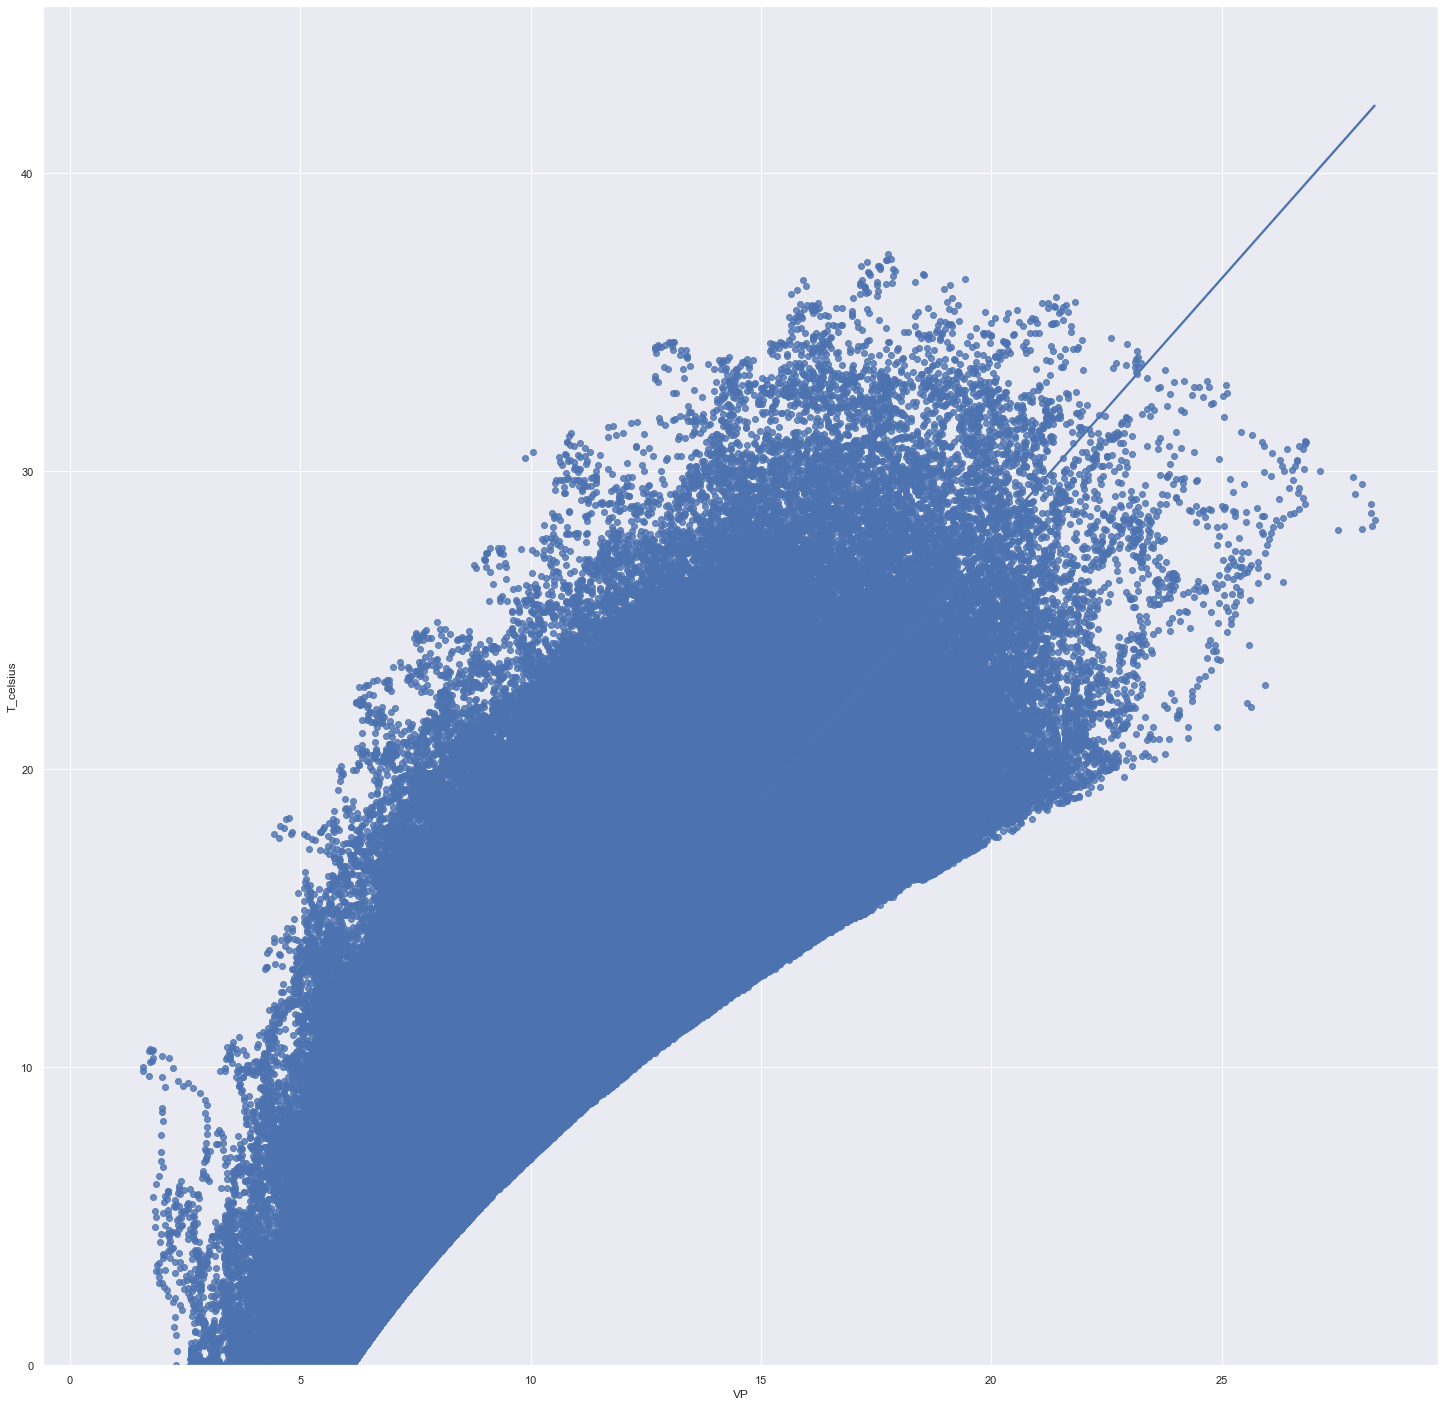

In [57]:
sns.regplot(x='VP', y="T_celsius", data=df)
plt.ylim(0,)

### Resultat 2: oui, plus il y'a de vapeur dans l'aire plus la température augmente. Il existe don une corrélation positive entre la vapeur et la température. 

### Question de recherche 3: est-ce que la concentration en vapeur d'eau (water_vc) influence le climat?

(0.0, 45.87843260867268)

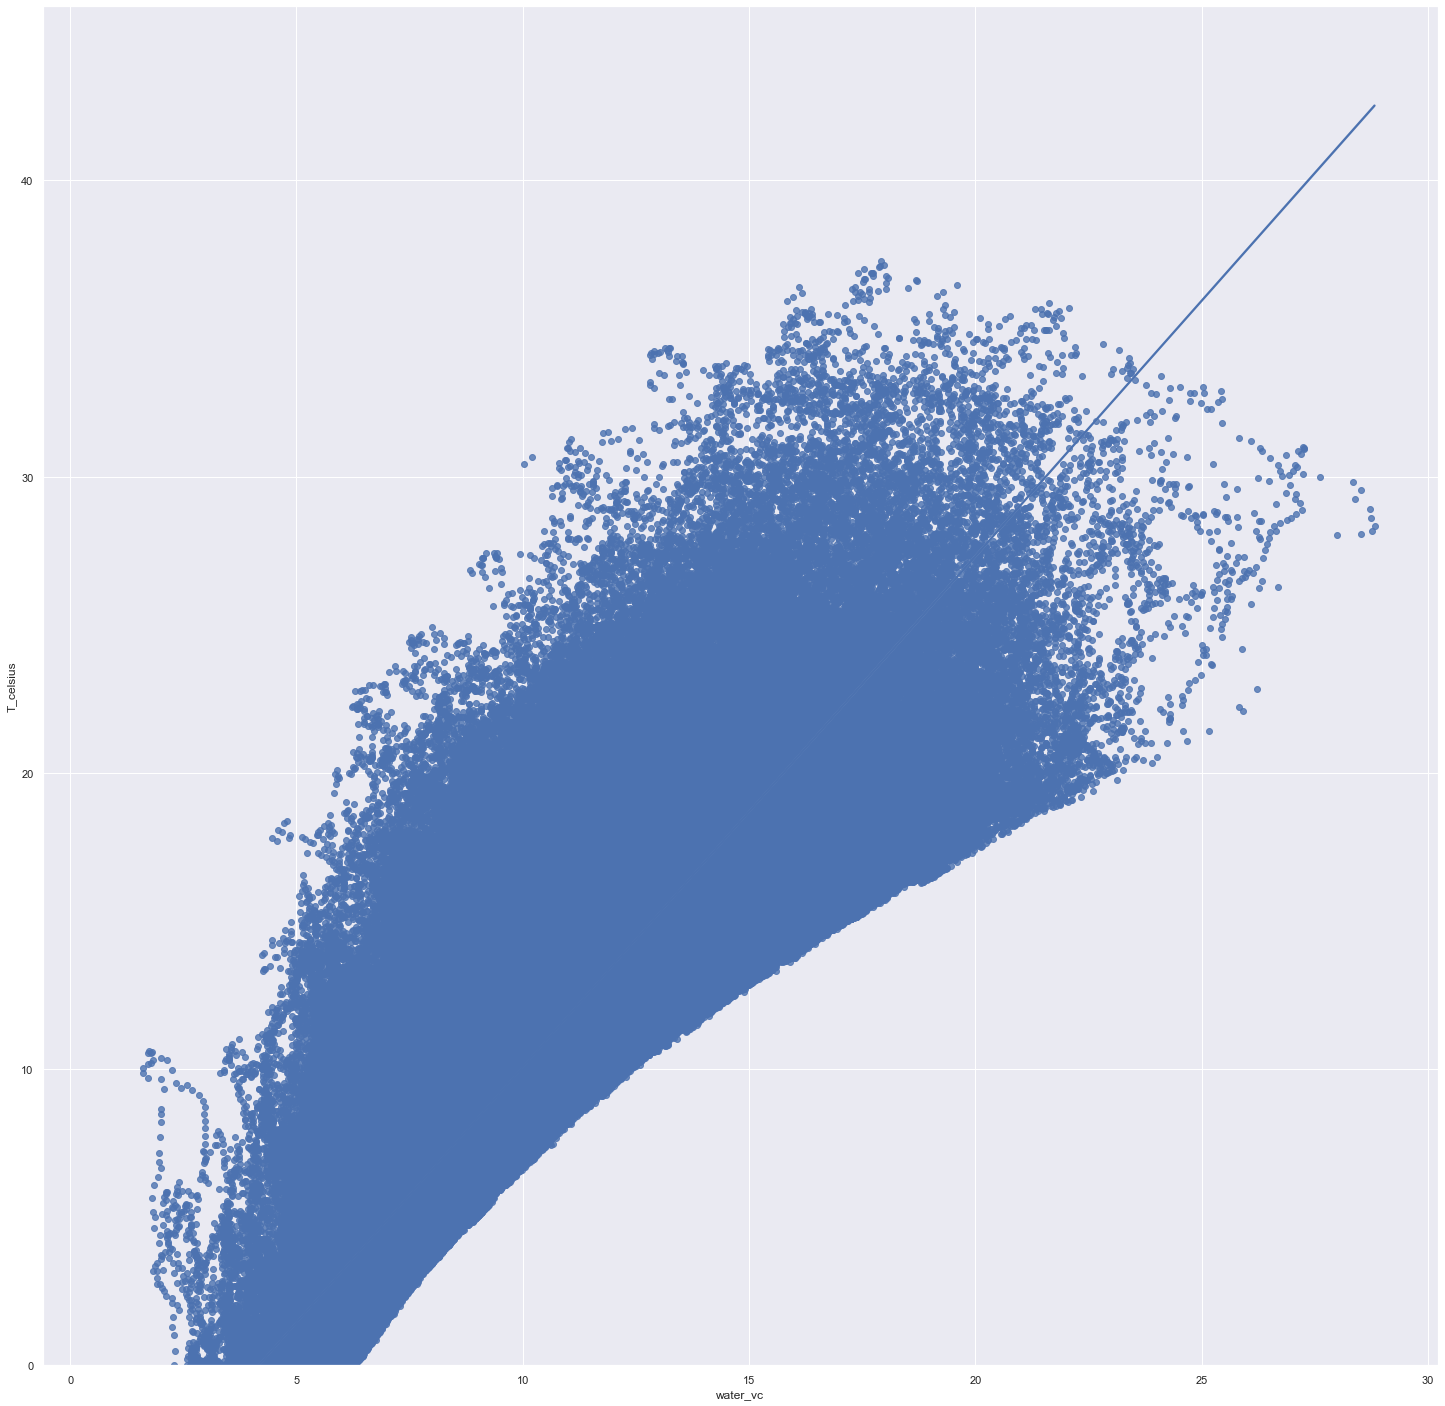

In [58]:
sns.regplot(x='water_vc', y="T_celsius", data=df)
plt.ylim(0,)

### resultat 3: oui .....

### Question de recherche 4: est-ce que la vitesse du vent (wind_speed) influence le climat?

(0.0, 40.2945)

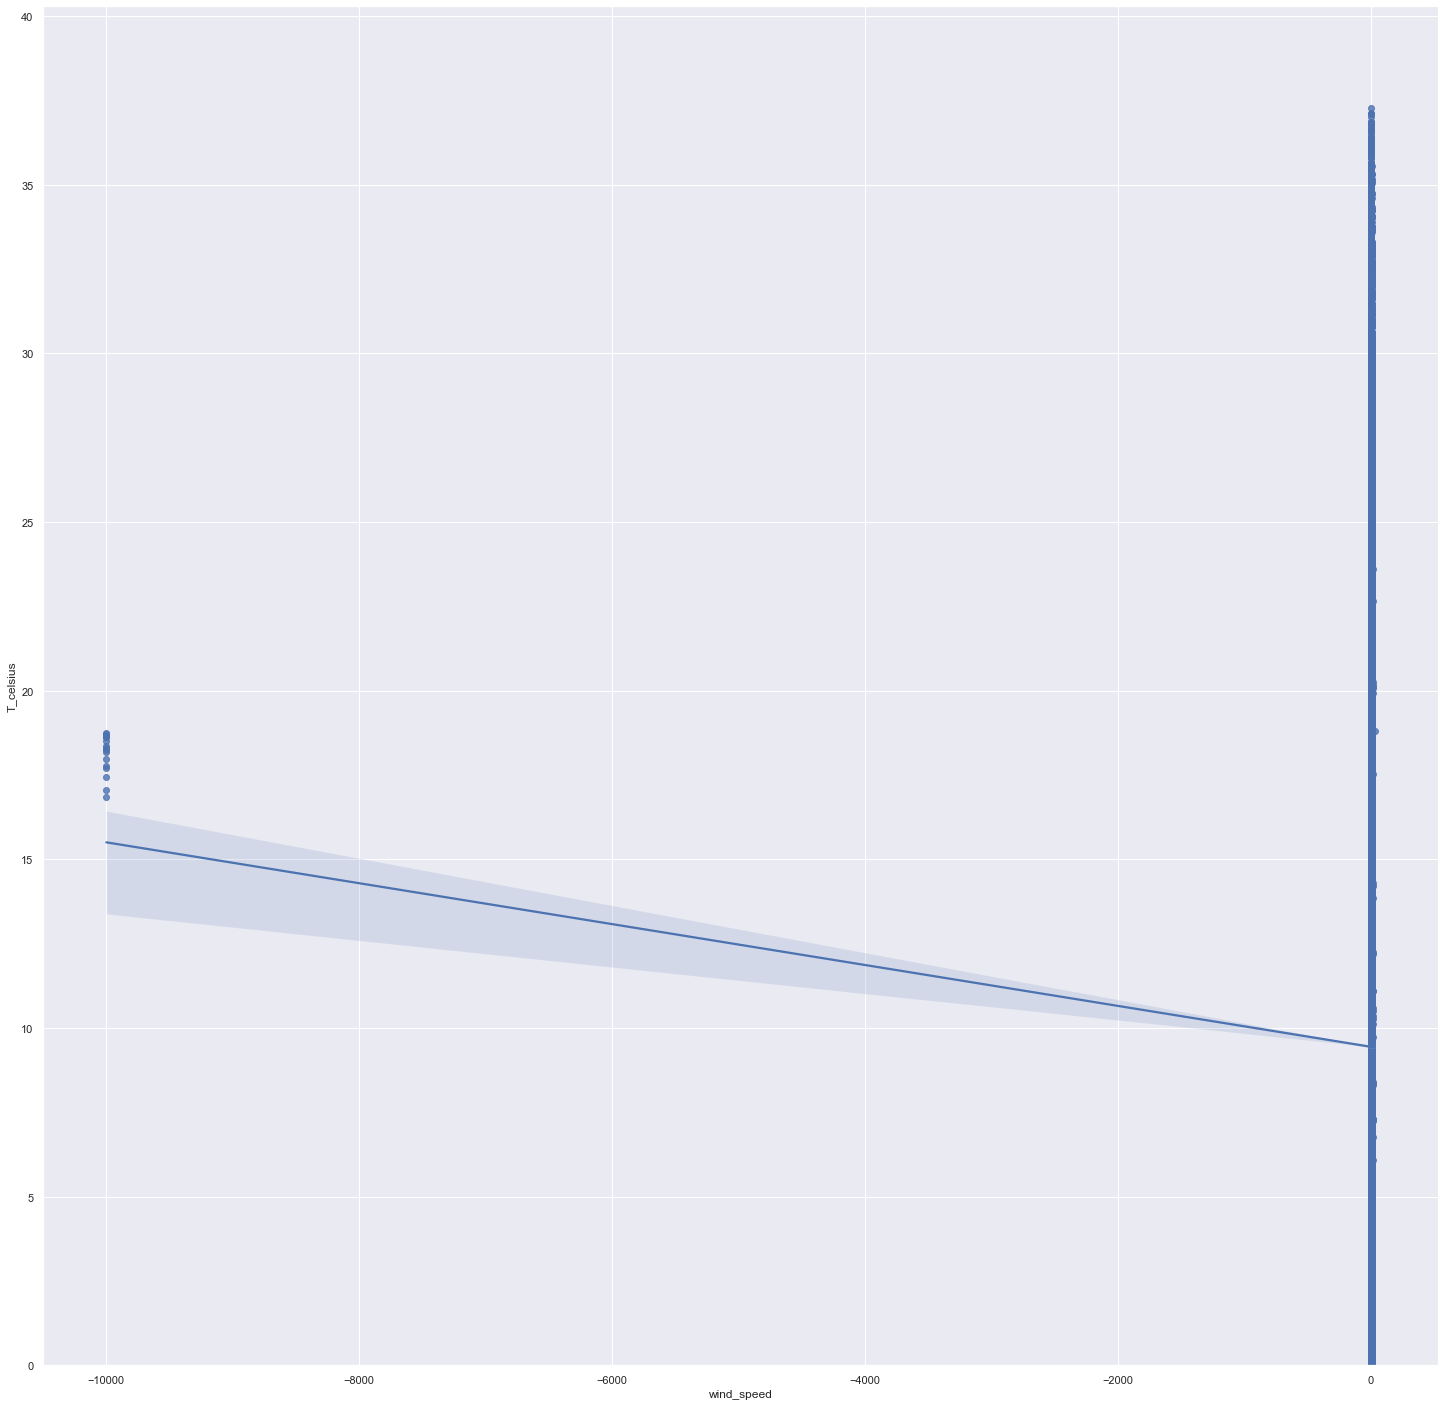

In [59]:
sns.regplot(x='wind_speed', y="T_celsius", data=df)
plt.ylim(0,)

### Résultat 4: oui, plus la vitesse du vent augment, plus la température baisse.

## conclusion

> il était question de determiner les facteurs qui influencent le changement climatique. chemin faisant, nous avons choisi la température comme élément qui répresente le changement climatique selon qu'il fait chaud ou froid. Et d'après notre analyse, les facteurs qui influencent fortement le changement de température sont: l'humidité, la pression de vapeurs dans l'air, la concentration de la vapeur d'eau dans l'aire et la vitesse du vent.